In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chinese_meaning = {
"bacno" : "歸戶帳號",
"txkey" : "交易序號",
"locdt" : "授權日期",
"loctm" : "授權時間",
"cano" : "交易卡號",
"contp" : "交易類別",
"etymd" : "交易型態",
"mchno" : "特店代號",
"acqic" : "收單行代碼",
"mcc" : "MCC_CODE",
"conam" : "交易金額-台幣",
"ecfg" : "網路交易註記",
"insfg" : "分期交易註記",
"iterm" : "分期期數",
"stocn" : "消費地國別",
"scity" : "消費城市",
"stscd" : "狀態碼",
"ovrlt" : "超額註記碼",
"flbmk" : "Fallback註記",
"hcefg" : "支付形態",
"csmcu" : "消費地幣別",
"flg_3dsmk" : "3DS交易註記",
"fraud_ind" : "盜刷註記"
}

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train_fraud=train[train['fraud_ind']==1]
train_ok=train[train['fraud_ind']==0]
print(len(train_ok), len(train_fraud))

1501432 20355


In [4]:
pd.set_option('display.max_columns', 100)
train.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [6]:
train.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


# EDA: 每個欄位有多少的數值 以及 哪些值

In [7]:
for i in train.columns :
    print(i, chinese_meaning[i], train[i].unique().size, end=" ")  # can also use .value_counts()
    if train[i].unique().size < 20 :
        print(train[i].unique())
    else :
        print()

acqic 收單行代碼 6051 
bacno 歸戶帳號 95214 
cano 交易卡號 129413 
conam 交易金額-台幣 72961 
contp 交易類別 7 [5 3 6 2 4 0 1]
csmcu 消費地幣別 72 
ecfg 網路交易註記 2 ['N' 'Y']
etymd 交易型態 11 [ 0  2  5  4  8  1  9  6  3  7 10]
flbmk Fallback註記 3 ['N' 'Y' nan]
flg_3dsmk 3DS交易註記 3 ['N' 'Y' nan]
fraud_ind 盜刷註記 2 [0 1]
hcefg 支付形態 9 [5 0 3 1 2 7 8 9 6]
insfg 分期交易註記 2 ['N' 'Y']
iterm 分期期數 9 [0 1 2 8 3 4 7 6 5]
locdt 授權日期 90 
loctm 授權時間 84810 
mcc MCC_CODE 434 
mchno 特店代號 89316 
ovrlt 超額註記碼 2 ['N' 'Y']
scity 消費城市 5698 
stocn 消費地國別 103 
stscd 狀態碼 5 [0 2 4 1 3]
txkey 交易序號 1521787 


# EDA: 每個欄位有多少的數值 以及 哪些值 => 盜刷

In [8]:
for i in train_fraud.columns :
    print(i, chinese_meaning[i], train_fraud[i].unique().size, end=" ")    # can also use .value_counts()  
    if train_fraud[i].unique().size < 20 :   
        print(train_fraud[i].unique())  
    else :
        print()

acqic 收單行代碼 556 
bacno 歸戶帳號 8643 
cano 交易卡號 8730 
conam 交易金額-台幣 7147 
contp 交易類別 5 [5 4 3 2 6]
csmcu 消費地幣別 45 
ecfg 網路交易註記 2 ['Y' 'N']
etymd 交易型態 10 [8 0 2 1 5 4 9 6 3 7]
flbmk Fallback註記 3 ['N' 'Y' nan]
flg_3dsmk 3DS交易註記 3 ['N' 'Y' nan]
fraud_ind 盜刷註記 1 [1]
hcefg 支付形態 5 [5 1 7 0 6]
insfg 分期交易註記 2 ['N' 'Y']
iterm 分期期數 4 [0 2 1 4]
locdt 授權日期 90 
loctm 授權時間 17456 
mcc MCC_CODE 192 
mchno 特店代號 2000 
ovrlt 超額註記碼 2 ['N' 'Y']
scity 消費城市 1080 
stocn 消費地國別 58 
stscd 狀態碼 3 [2 0 1]
txkey 交易序號 20355 


# EDA: 每個欄位每一個值(<20) 所累積的筆數 => 正常 vs. 盜刷

In [9]:
ok_ttl = train[train['fraud_ind']==0].shape[0]
fraud_ttl = train[train['fraud_ind']==1].shape[0]

# print(ok_ttl, fraud_ttl)
# print ('{0:.0%}'.format(1.0/3.0))

for i in train.columns :
    if train[i].unique().size < 20 :
        print(i, chinese_meaning[i], "=",train[i].unique())
        for j in train[i].unique() :
            ok_num = train[(train[i]==j) & (train['fraud_ind']==0)].shape[0]
            fraud_num = train[(train[i]==j) & (train['fraud_ind']==1)].shape[0]
            print (" value ",j,": count(ok)=",ok_num, '{0:.2%}'.format(ok_num/ok_ttl), end=" ")
            print (": count(fraud)=",fraud_num, '{0:.2%}'.format(fraud_num/fraud_ttl))

contp 交易類別 = [5 3 6 2 4 0 1]
 value  5 : count(ok)= 1350253 89.93% : count(fraud)= 19553 96.06%
 value  3 : count(ok)= 2134 0.14% : count(fraud)= 14 0.07%
 value  6 : count(ok)= 13590 0.91% : count(fraud)= 3 0.01%
 value  2 : count(ok)= 66139 4.41% : count(fraud)= 8 0.04%
 value  4 : count(ok)= 69188 4.61% : count(fraud)= 777 3.82%
 value  0 : count(ok)= 44 0.00% : count(fraud)= 0 0.00%
 value  1 : count(ok)= 84 0.01% : count(fraud)= 0 0.00%
ecfg 網路交易註記 = ['N' 'Y']
 value  N : count(ok)= 1131650 75.37% : count(fraud)= 2862 14.06%
 value  Y : count(ok)= 369782 24.63% : count(fraud)= 17493 85.94%
etymd 交易型態 = [ 0  2  5  4  8  1  9  6  3  7 10]
 value  0 : count(ok)= 129839 8.65% : count(fraud)= 183 0.90%
 value  2 : count(ok)= 369865 24.63% : count(fraud)= 7804 38.34%
 value  5 : count(ok)= 404408 26.93% : count(fraud)= 203 1.00%
 value  4 : count(ok)= 320327 21.33% : count(fraud)= 175 0.86%
 value  8 : count(ok)= 232427 15.48% : count(fraud)= 11568 56.83%
 value  1 : count(ok)= 10316 0.

# EDA: 每個欄位每一個值(<200) 所累積的筆數 => 正常 vs. 盜刷

In [10]:
ok_ttl = train[train['fraud_ind']==0].shape[0]
fraud_ttl = train[train['fraud_ind']==1].shape[0]
for i in train.columns :
    if (train[i].unique().size > 20) and (train[i].unique().size < 200) :
        print(i, chinese_meaning[i], "=",train[i].unique())
        for j in train[i].unique() :
            ok_num = train[(train[i]==j) & (train['fraud_ind']==0)].shape[0]
            fraud_num = train[(train[i]==j) & (train['fraud_ind']==1)].shape[0]
            print (" value ",j,": count(ok)=", ok_num, '{0:.2%}'.format(ok_num/ok_ttl), end=" ")
            print (": count(fraud)=",fraud_num, '{0:.2%}'.format(fraud_num/fraud_ttl))

csmcu 消費地幣別 = [ 0 62 74 61 13 67 60 26 49 10 71 56 20 38 22  4 47 54 75 32 66 29 28 14
 50 30 31 45 24 40 35 59  3 48 63 52 41 23 17 16 73 51 53 44 18 12 15  5
 70 21 39 27 42 11 72  6 25  7 43  2 19 37  1 64 57 36 68 55  9 46 34 69]
 value  0 : count(ok)= 176088 11.73% : count(fraud)= 190 0.93%
 value  62 : count(ok)= 1237095 82.39% : count(fraud)= 8947 43.95%
 value  74 : count(ok)= 101 0.01% : count(fraud)= 17 0.08%
 value  61 : count(ok)= 27275 1.82% : count(fraud)= 6885 33.82%
 value  13 : count(ok)= 17188 1.14% : count(fraud)= 188 0.92%
 value  67 : count(ok)= 81 0.01% : count(fraud)= 3 0.01%
 value  60 : count(ok)= 2468 0.16% : count(fraud)= 1082 5.32%
 value  26 : count(ok)= 11747 0.78% : count(fraud)= 626 3.08%
 value  49 : count(ok)= 663 0.04% : count(fraud)= 30 0.15%
 value  10 : count(ok)= 889 0.06% : count(fraud)= 457 2.25%
 value  71 : count(ok)= 6740 0.45% : count(fraud)= 631 3.10%
 value  56 : count(ok)= 214 0.01% : count(fraud)= 12 0.06%
 value  20 : count(ok)= 1297 0.

# EDA: 盜刷筆數的欄位裡比例高的值 對應到的筆數，之間的關聯

In [11]:
g = [pd.DataFrame() for i in range(13)]
g[1] = train[(train['contp']==5) & (train['fraud_ind']==1)]
g[2] = train[(train['ecfg']=='N') & (train['fraud_ind']==1)]
g[3] = train[(train['etymd']==2) & (train['fraud_ind']==1)]
g[4] = train[(train['etymd']==8) & (train['fraud_ind']==1)]
g[5] = train[(train['flbmk']=='N') & (train['fraud_ind']==1)]
g[6] = train[(train['flg_3dsmk']=='N') & (train['fraud_ind']==1)]
g[7] = train[(train['hcefg']==5) & (train['fraud_ind']==1)]
g[8] = train[(train['insfg']=='N') & (train['fraud_ind']==1)]
g[9] = train[(train['iterm']==0) & (train['fraud_ind']==1)]
g[10] = train[(train['ovrlt']=='N') & (train['fraud_ind']==1)]
g[11] = train[(train['stscd']==0) & (train['fraud_ind']==1)]
g[12] = train[(train['stscd']==2) & (train['fraud_ind']==1)]

In [12]:
for x in np.arange(13) :
    for y in np.arange(13) :
        if y == 0: 
            print('{:2}'.format(x),':',end=' ')
            continue            
        if x == 0:
            print('{:5}'.format(y)  , end=' ')
        else :
            intersected_df = pd.merge(g[x], g[y], how='inner')
            print('{:5}'.format(intersected_df.shape[0]), end=' ')
    print()

print()
for x in np.arange(13) :
    for y in np.arange(13) :
        if y == 0: 
            print('{:2}'.format(x),':',end=' ')
            continue            
        if x == 0:
            print('{:7}'.format(y)  , end=' ')
        else :
            intersected_df = pd.merge(g[x], g[y], how='inner')
            df_union= pd.concat([g[x], g[y]]).drop_duplicates()            
            intersection = intersected_df.shape[0]
            union = df_union.shape[0]
            print('{0:7.2%}'.format(intersection/union), end=' ')
    print()

 0 :     1     2     3     4     5     6     7     8     9    10    11    12 
 1 : 19553  2546  7359 11260 19276 19263 19323 19516 19516 18947 14234  5299 
 2 :  2546  2862  1898     0  2756  2843  2812  2855  2855  2717  2083   765 
 3 :  7359  1898  7804     0  7755  7717  7731  7796  7796  7648  5577  2222 
 4 : 11260     0     0 11568 11435 11373 11425 11546 11546 11200  8195  3362 
 5 : 19276  2756  7755 11435 20073 19973 20022 20036 20036 19449 14438  5610 
 6 : 19263  2843  7717 11373 19973 20060 20011 20024 20024 19437 14392  5643 
 7 : 19323  2812  7731 11425 20022 20011 20109 20072 20072 19483 14434  5650 
 8 : 19516  2855  7796 11546 20036 20024 20072 20318 20318 19685 14642  5651 
 9 : 19516  2855  7796 11546 20036 20024 20072 20318 20318 19685 14642  5651 
10 : 18947  2717  7648 11200 19449 19437 19483 19685 19685 19720 14313  5382 
11 : 14234  2083  5577  8195 14438 14392 14434 14642 14642 14313 14679     0 
12 :  5299   765  2222  3362  5610  5643  5650  5651  5651  5382

# EDA: 盜刷筆數的欄位裡比例高的值(除去正常筆數也高的值) 對應到的筆數，之間的關聯

In [13]:
gc = [pd.DataFrame() for i in range(6)]
gc[1] = train[(train['ecfg']=='N') & (train['fraud_ind']==1)]
gc[2] = train[(train['etymd']==2) & (train['fraud_ind']==1)]
gc[3] = train[(train['etymd']==8) & (train['fraud_ind']==1)]
gc[4] = train[(train['stscd']==0) & (train['fraud_ind']==1)]
gc[5] = train[(train['stscd']==2) & (train['fraud_ind']==1)]

In [14]:
for x in np.arange(6) :
    for y in np.arange(6) :
        if y == 0: 
            print('{:2}'.format(x),':',end=' ')
            continue            
        if x == 0:
            print('{:5}'.format(y)  , end=' ')
        else :
            intersected_df = pd.merge(gc[x], gc[y], how='inner')
            print('{:5}'.format(intersected_df.shape[0]), end=' ')
    print()

print()
for x in np.arange(6) :
    for y in np.arange(6) :
        if y == 0: 
            print('{:2}'.format(x),':',end=' ')
            continue            
        if x == 0:
            print('{:7}'.format(y)  , end=' ')
        else :
            intersected_df = pd.merge(gc[x], gc[y], how='inner')
            df_union= pd.concat([gc[x], gc[y]]).drop_duplicates()            
            intersection = intersected_df.shape[0]
            union = df_union.shape[0]
            print('{0:7.2%}'.format(intersection/union), end=' ')
    print()

 0 :     1     2     3     4     5 
 1 :  2862  1898     0  2083   765 
 2 :  1898  7804     0  5577  2222 
 3 :     0     0 11568  8195  3362 
 4 :  2083  5577  8195 14679     0 
 5 :   765  2222  3362     0  5651 

 0 :       1       2       3       4       5 
 1 : 100.00%  21.65%   0.00%  13.48%   9.87% 
 2 :  21.65% 100.00%   0.00%  32.99%  19.78% 
 3 :   0.00%   0.00% 100.00%  45.40%  24.26% 
 4 :  13.48%  32.99%  45.40% 100.00%   0.00% 
 5 :   9.87%  19.78%  24.26%   0.00% 100.00% 


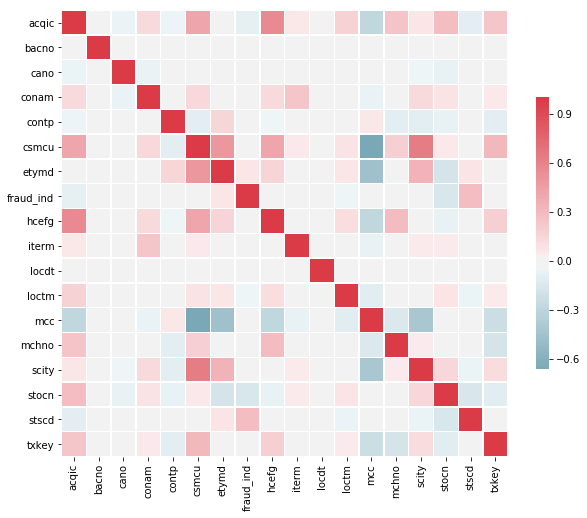

In [15]:
train_corr=train.corr(method='pearson')

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(train_corr, cmap=cmap, annot=False, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5})

In [16]:
train_corr.loc[np.absolute(train_corr['csmcu'])>=0.05, 'csmcu']

acqic    0.409295
conam    0.140327
contp   -0.097577
csmcu    1.000000
etymd    0.496671
hcefg    0.409084
iterm    0.053883
loctm    0.089116
mcc     -0.664912
mchno    0.190807
scity    0.634497
stocn    0.053153
txkey    0.308936
Name: csmcu, dtype: float64

In [17]:
train_corr.loc[np.absolute(train_corr['stocn'])>0.01, 'stocn']

acqic        0.289046
cano        -0.071349
conam        0.086820
contp       -0.073389
csmcu        0.053153
etymd       -0.181726
fraud_ind   -0.161405
hcefg       -0.074832
iterm        0.045642
loctm        0.070883
mchno        0.023774
scity        0.143556
stocn        1.000000
stscd       -0.162237
txkey       -0.111455
Name: stocn, dtype: float64

# EDA : 一個消費城市是否只對到一個消費國別 ? 對到多個!! 

In [18]:
country_count = train['stocn'].unique().size
city_list = [np.array([]) for i in range(country_count)]
i = 0
for country in train['stocn'].unique() :
    t = train[train['stocn']==country]
    city_list[i] = t['scity'].unique()
    # print(city_list[i])
    i = i+1
    # print(i,":",country)

for c in np.arange(country_count) :
    for cnext in np.arange(c+1, country_count) :
        intersect = np.intersect1d(city_list[c],city_list[cnext])
        if len(intersect) > 0 :
            print (c, cnext, '=', intersect)

0 3 = [   0 3426 4356]
0 4 = [   0 3426]
0 5 = [   0  879 3426 4356 5491]
0 6 = [   0 1759 3426 4356]
0 7 = [   0 1759]
0 8 = [   0 1689 3426]
0 9 = [   0 3426]
0 10 = [   0  521 3426 4356 5817]
0 11 = [   0 4356]
0 13 = [   0 2615 3426]
0 14 = [0]
0 15 = [0]
0 17 = [   0 3426]
0 19 = [0]
0 21 = [   0 3426]
0 22 = [0]
0 23 = [0]
0 25 = [0]
0 28 = [0]
0 29 = [0]
0 32 = [   0 5491]
0 33 = [0]
0 35 = [0]
0 37 = [0]
0 38 = [3426]
0 40 = [0]
0 42 = [0]
0 45 = [   0 3426]
0 49 = [0]
0 50 = [0]
0 52 = [0]
0 55 = [5491]
0 56 = [0]
0 60 = [0]
0 65 = [3426]
0 68 = [0]
0 70 = [1759]
0 72 = [3426]
0 82 = [0]
0 89 = [0]
0 97 = [3426]
0 102 = [0]
1 3 = [595]
1 4 = [595]
1 8 = [595]
1 9 = [595]
1 13 = [595]
1 14 = [595]
1 20 = [595]
1 25 = [595]
1 29 = [595]
1 30 = [595]
1 38 = [595]
1 40 = [595]
1 41 = [595]
1 45 = [595]
1 56 = [595]
1 64 = [595]
1 75 = [595]
3 4 = [   0  441  595  621  695 3426 4091 4724]
3 5 = [   0  621 3426 4356]
3 6 = [   0  621 1115 2809 3426 4356 6572 6577]
3 7 = [  0 621]
3 

# EDA : 觀察消費金額

count    1.501432e+06
mean     6.539417e+02
std      4.000886e+02
min      0.000000e+00
25%      4.382100e+02
50%      5.915500e+02
75%      8.037000e+02
max      7.208770e+03
Name: conam, dtype: float64


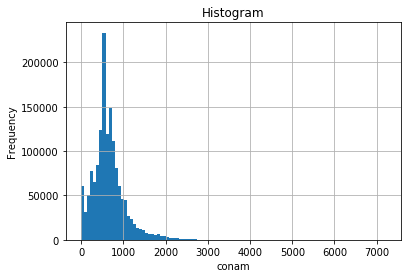

In [19]:
train_ok = train.loc[train['fraud_ind']==0,'conam']
print(train_ok.describe())
train_ok.hist(bins=100)
plt.xlabel('conam')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()   

count    20355.000000
mean       712.266507
std        565.645161
min          0.000000
25%        216.120000
50%        696.350000
75%       1016.340000
max       3353.250000
Name: conam, dtype: float64


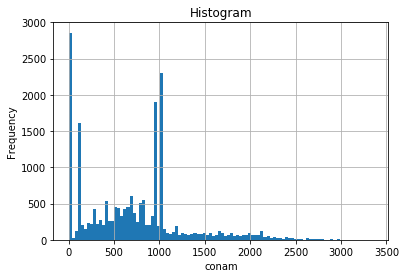

In [20]:
train_fraud = train.loc[train['fraud_ind']==1,'conam']
print(train_fraud.describe())
train_fraud.hist(bins=100)
plt.xlabel('conam')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()  

count    5823.000000
mean      630.510809
std       393.739717
min         0.000000
25%       407.870000
50%       569.540000
75%       792.065000
max      5278.280000
Name: conam, dtype: float64


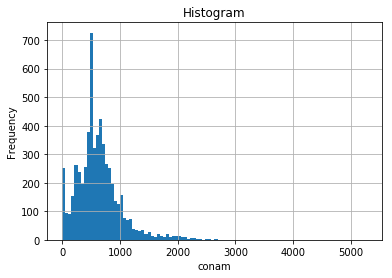

In [21]:
test_fraud = test.loc[train['fraud_ind']==1,'conam']
print(test_fraud.describe())
test_fraud.hist(bins=100)
plt.xlabel('conam')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()  